# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import tree
import pickle

In [2]:
#loading data for binary classification
data_earthquakes = pd.read_csv('data_for_classification.csv')

features = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance']
X = data_earthquakes[features]

Function that performs classification with DecisionTreeClassifier:   
(Function depends on the name of the target variable)

In [3]:
# target_name = ['Is-erupting' | 'Is-erupting-tomorrow' | 'Is-erupting-next-week']

def decision_tree_classication(target_name):
    
    y = data_earthquakes[target_name]
    
    X_train_validation, X_test, y_train_validation, y_test = \
        model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)
    
    # standardization    
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train_validation)
    X_train_validation = scaler.transform(X_train_validation)
    X_test = scaler.transform(X_test)
    
    
    # using grid search to find the optimal hyperparameters of a model
    
    grid_model = tree.DecisionTreeClassifier()
    
    params = {
        'criterion': ['entropy', 'gini'], 
        'max_depth': range(30, 65, 3),
        'max_features': range(2, 6)
    }
    
    grid = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='recall', 
                                        cv=10, return_train_score=True)
    grid.fit(X_train_validation, y_train_validation)
    
    print('Best recall score: ', grid.best_score_)
    print('Best parameters: \n\tCriterion: ', grid.best_params_['criterion'], 
          '\n\tMax_depth: ', grid.best_params_['max_depth'],
          '\n\tMax_features: ', grid.best_params_['max_features'])
    
    
    
    # testing
    model = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_features=2, 
                                    max_depth=grid.best_params_['max_depth'], random_state=7)

    model.fit(X_train_validation, y_train_validation)
    
    
    y_test_predicted = model.predict(X_test)
    y_train_predicted = model.predict(X_train_validation)
    
    # feature importances based on decision tree 
    feature_importances = model.tree_.compute_feature_importances(normalize=False)
    
    plt.bar([x for x in range(len(features))], feature_importances)
    plt.xticks(np.arange(len(features)), features)

    plt.savefig('./assets/classification/decision-tree-'+ target_name + '.png')
    plt.show()
    
    
    print('\n\nTest results')
    
    print('\taccuracy_score: ', metrics.accuracy_score(y_test, y_test_predicted))
    print('\trecall_score: ', metrics.recall_score(y_test, y_test_predicted))
    print('\tf1_score: ', metrics.f1_score(y_test, y_test_predicted))
    print('\nConfusion matrix on test data: ')
    print(metrics.confusion_matrix(y_test, y_test_predicted))
    
    
    print('\n\nTrain results')
    
    print('\taccuracy_score: ', metrics.accuracy_score(y_train_validation, y_train_predicted))
    print('\trecall_score: ', metrics.recall_score(y_train_validation, y_train_predicted))
    print('\tf1_score: ', metrics.f1_score(y_train_validation, y_train_predicted))
    print('\nConfusion matrix on train data')
    print(metrics.confusion_matrix(y_train_validation, y_train_predicted))
    
    
    # cross validation
    
    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_features=2, 
                                        max_depth=grid.best_params_['max_depth'], random_state=7)

    scores = model_selection.cross_val_score(model, X, y, scoring='recall', cv=kf)
    print('\nCross validation mean recall score: ', scores.mean())
    
    
    

### Predicting whether an eruption is in progress

Best recall score:  0.7161813426329555
Best parameters: 
	Criterion:  gini 
	Max_depth:  45 
	Max_features:  4


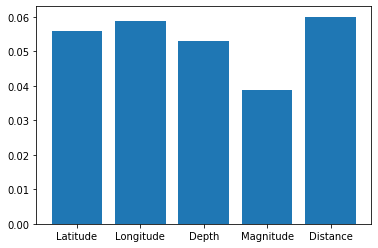



Test results
	accuracy_score:  0.9180384682030844
	recall_score:  0.7366120218579235
	f1_score:  0.7402526084568918

Confusion matrix on test data: 
[[4624  232]
 [ 241  674]]


Train results
	accuracy_score:  1.0
	recall_score:  1.0
	f1_score:  1.0

Confusion matrix on train data
[[9858    0]
 [   0 1857]]

Cross validation mean recall score:  0.8336832861742609


In [4]:
decision_tree_classication('Is-erupting')

### Predicting whether there will be an eruption tomorrow

Best recall score:  0.7304197994987469
Best parameters: 
	Criterion:  gini 
	Max_depth:  63 
	Max_features:  4


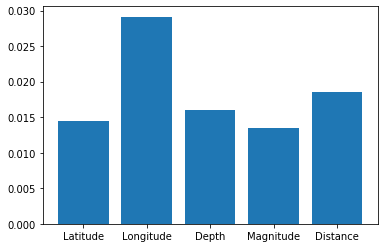



Test results
	accuracy_score:  0.9766071738000347
	recall_score:  0.7122302158273381
	f1_score:  0.7457627118644069

Confusion matrix on test data: 
[[5438   55]
 [  80  198]]


Train results
	accuracy_score:  1.0
	recall_score:  1.0
	f1_score:  1.0

Confusion matrix on train data
[[11151     0]
 [    0   564]]

Cross validation mean recall score:  0.8324950690335304


In [5]:
decision_tree_classication('Is-erupting-tomorrow')

### Predicting whether there will be an eruption next week

Best recall score:  0.72129438229572
Best parameters: 
	Criterion:  gini 
	Max_depth:  45 
	Max_features:  4


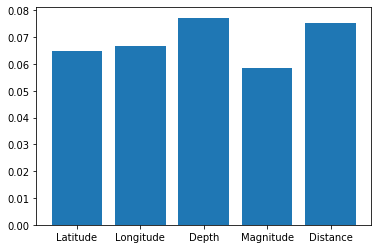



Test results
	accuracy_score:  0.8925662796742332
	recall_score:  0.7581027667984189
	f1_score:  0.7557131599684792

Confusion matrix on test data: 
[[4192  314]
 [ 306  959]]


Train results
	accuracy_score:  1.0
	recall_score:  1.0
	f1_score:  1.0

Confusion matrix on train data
[[9146    0]
 [   0 2569]]

Cross validation mean recall score:  0.8484618448330444


In [6]:
decision_tree_classication('Is-erupting-next-week')

### Saving model for predicting whether an eruption is in progress

In [10]:
y = data_earthquakes['Is-erupting']

# standardization    
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# model with best params from grid search
model = tree.DecisionTreeClassifier(criterion='gini', max_features=4, max_depth=45, random_state=7)
model.fit(X, y)
with open('models/is_erupting.model', 'wb') as pickle_file:
    pickle.dump(model, pickle_file)
with open('models/is_erupting.scaler', 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

### Saving model for predicting whether there will be an eruption tomorrow

In [11]:
y = data_earthquakes['Is-erupting-tomorrow']

# standardization    
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# model with best params from grid search
model = tree.DecisionTreeClassifier(criterion='gini', max_features=4, max_depth=63, random_state=7)
model.fit(X, y)
with open('models/is_erupting_tomorrow.model', 'wb') as pickle_file:
    pickle.dump(model, pickle_file)
with open('models/is_erupting_tomorrow.scaler', 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

### Saving model for predicting whether there will be an eruption next week

In [12]:
y = data_earthquakes['Is-erupting-next-week']

# standardization    
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# model with best params from grid search
model = tree.DecisionTreeClassifier(criterion='gini', max_features=4, max_depth=45, random_state=7)
model.fit(X, y)
with open('models/is_erupting_next_week.model', 'wb') as pickle_file:
    pickle.dump(model, pickle_file)
with open('models/is_erupting_next_week.scaler', 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)